In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [ ]:
!pip install yfinance --upgrade --no cache-dir
!pip install yfinance
import yfinance as yf
yf.pdr_override()

In [ ]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install git+https://github.com/quantopian/pyfolio

#Obtendo dados do IBOVSPA


In [19]:
tickers = ['ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA', '^BVSP']
dados_yahoo = web.get_data_yahoo(tickers, period='5y', index_col='Date')['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [20]:
dados_yahoo.head()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-08-18,16.276962,4.406808,3.259039,15.219262,12.136276,47451.0
2015-08-19,15.789003,4.341744,3.132945,14.712538,12.122484,46588.0
2015-08-20,16.102692,4.329914,3.055349,15.000846,11.532957,46649.0
2015-08-21,15.736718,4.294422,2.977753,14.590223,11.692441,45720.0
2015-08-24,15.754150,4.205696,2.667368,13.454457,11.456686,44336.0


In [21]:
#calcular todo o diario que baixamos
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-08-18,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-19,-0.029978,-0.014764,-0.038691,-0.033295,-0.001136,-0.018187
2015-08-20,0.019868,-0.002725,-0.024768,0.019596,-0.048631,0.001309
2015-08-21,-0.022727,-0.008197,-0.025397,-0.027373,0.013829,-0.019915
2015-08-24,0.001108,-0.020661,-0.104235,-0.077844,-0.020163,-0.030271
...,...,...,...,...,...,...
2020-08-12,0.005220,-0.008824,0.018868,0.020239,0.009351,-0.000548
2020-08-13,-0.020030,-0.024728,0.005787,-0.018699,0.013235,-0.016226
2020-08-14,0.003785,0.007099,0.010357,0.016570,0.003919,0.008879


In [22]:
#retorno acumulado de todos os ativos
retorno_acumulado = (1 + retorno).cumprod()
#começando de 1
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-08-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-08-19,0.970022,0.985236,0.961309,0.966705,0.998864,0.981813
2015-08-20,0.989293,0.982551,0.937500,0.985649,0.950288,0.983098
2015-08-21,0.966809,0.974497,0.913691,0.958668,0.963429,0.963520
2015-08-24,0.967880,0.954363,0.818452,0.884041,0.944003,0.934353
...,...,...,...,...,...,...
2020-08-12,0.828164,2.294178,2.651088,4.040932,5.603037,2.152073
2020-08-13,0.811576,2.237447,2.666430,3.965370,5.677195,2.117152
2020-08-14,0.814648,2.253332,2.694046,4.031076,5.699442,2.135951


In [23]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira['saldo'] = carteira.sum(axis=1)
carteira['retorno'] = carteira['saldo'].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-08-18,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-08-19,9700.215003,9852.356903,9613.094942,9667.050640,9988.635692,48821.353181,-0.023573
2015-08-20,9892.934181,9825.510244,9374.999634,9856.486989,9502.879503,48452.810551,-0.007549
2015-08-21,9668.092797,9744.972433,9136.905058,9586.682452,9634.290412,47770.943151,-0.014073
2015-08-24,9678.802543,9543.633854,8184.523827,8840.413664,9440.033984,45687.407873,-0.043615
...,...,...,...,...,...,...,...
2020-08-12,8281.643288,22941.775288,26510.884165,40409.317812,56030.366009,154173.986562,0.010821
2020-08-13,8115.764975,22374.471231,26664.301286,39653.695420,56771.945640,153580.178552,-0.003852
2020-08-14,8146.483355,22533.317838,26940.456787,40310.757498,56994.416386,154925.431864,0.008759


#Resultados

Start date,2015-08-18
End date,2020-08-18
Total months,59
,Backtest
Annual return,26.007%
Cumulative returns,213.034%
Annual volatility,31.29%
Sharpe ratio,0.90
Calmar ratio,0.66
Stability,0.85
Max drawdown,-39.684%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.68,2020-01-23,2020-03-23,2020-07-20,128
1,38.11,2015-09-17,2016-01-18,2016-08-03,230
2,23.13,2018-02-26,2018-06-21,2019-07-05,355
3,16.01,2017-02-21,2017-04-13,2017-08-07,120
4,14.87,2019-07-10,2019-08-26,2019-11-22,98


Stress Events,mean,min,max
Fall2015,-0.08%,-5.04%,4.70%
New Normal,0.11%,-13.78%,12.37%


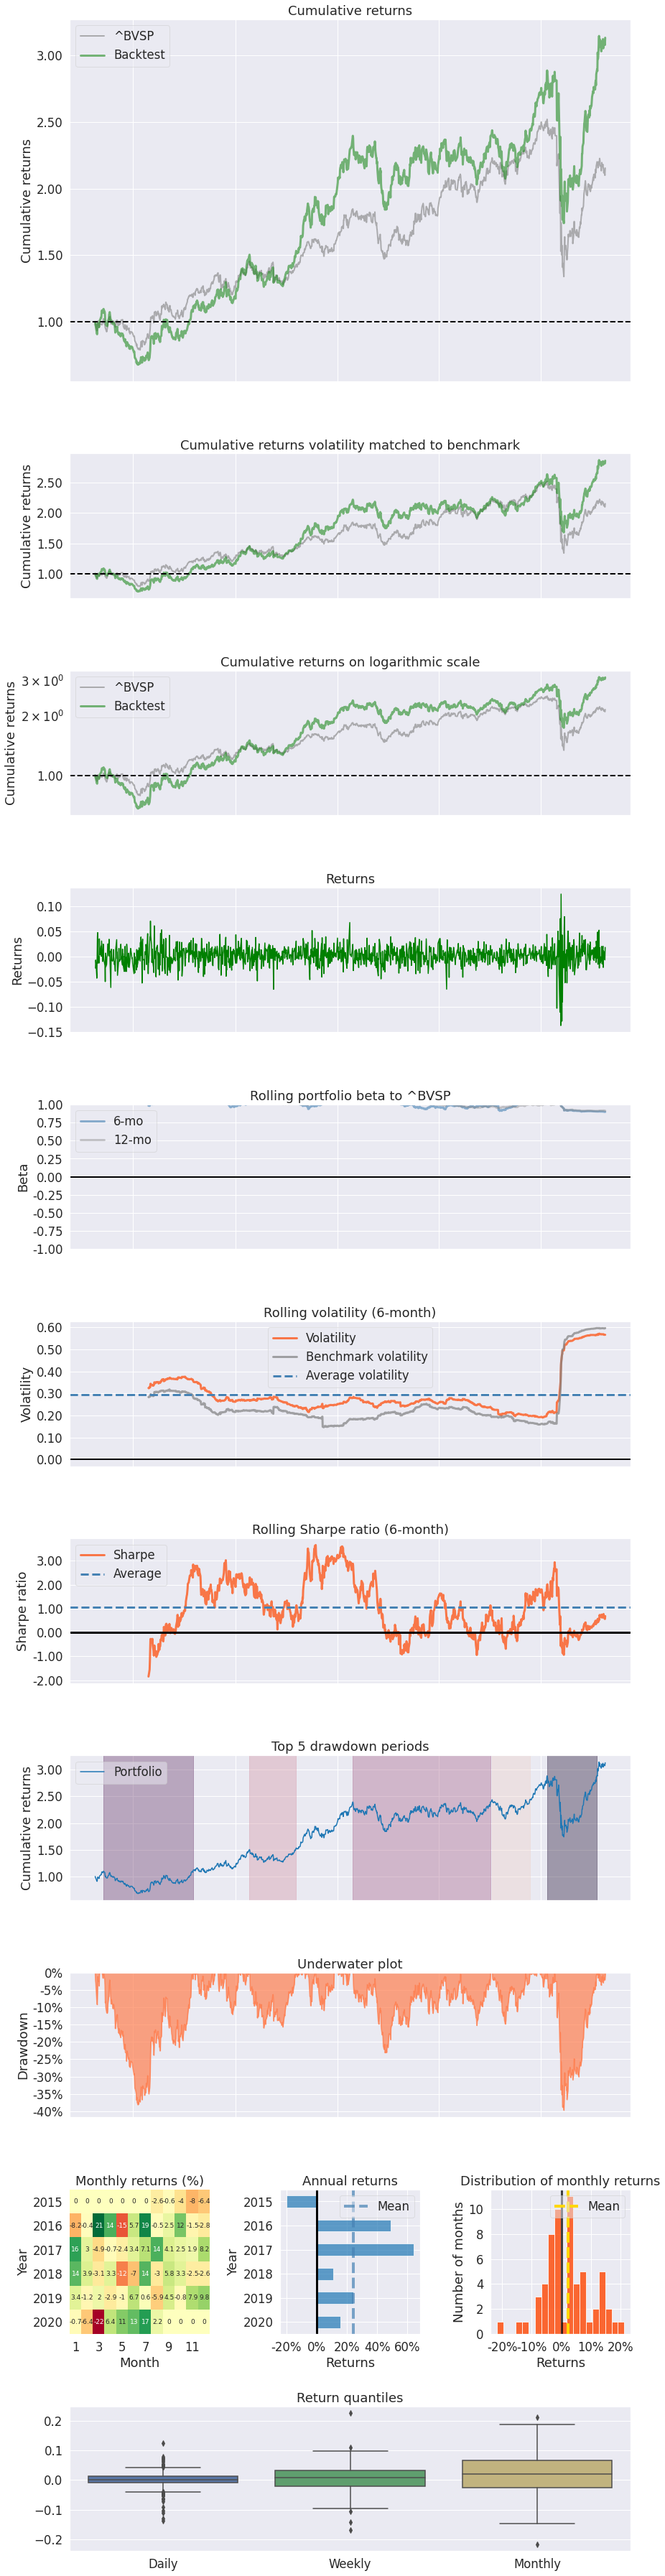

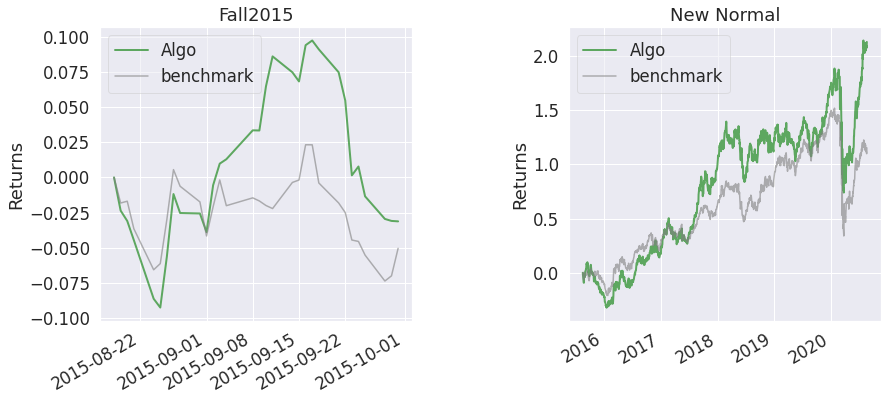

In [24]:
 pf.create_full_tear_sheet(carteira['retorno'], benchmark_rets= retorno['^BVSP'])

(0.8, 1.4)

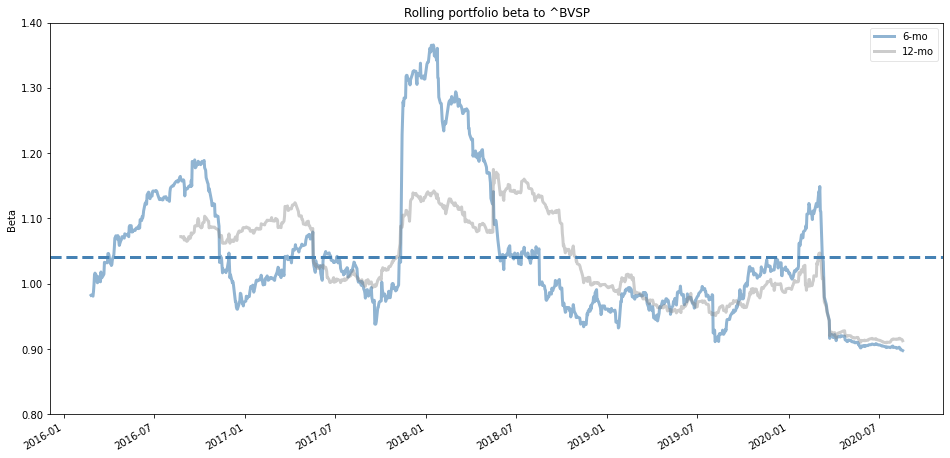

In [25]:
fig, ax1= plt.subplots(figsize=(16, 8))
pf.plot_rolling_beta(carteira['retorno'], factor_returns= retorno['^BVSP'], ax=ax1 )
plt.ylim((0.8, 1.4))